Fill in

- __FULL NAME__: Raf Engelen
- __STUDENT NUMBER__:  r0901812
- __CLASS__: 3APP1


# Practical 2: Machine Learning - Decision Trees & Linear Regression
# Score: ... /6

In the resources-folder you will find a csv-file 'patient_data.csv', containing patient data, and wether or not the patient has a postive or a negative outcome. 

Code the cells below.

In [100]:
# place all your necessary imports in this cell

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# A. EDA (Exploratory Data Analysis) 

Use *pandas* to read in the file, making sure you read in the first column as the index, otherwise you'll have an Unnamed column. 
And print the first 5 rows.

In [22]:
# use this cell to read in the csv file via pandas
patient_df=pd.read_csv('./resources/patient_data.csv', index_col=0)
patient_df


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol,Outcome
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,183,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,126,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,143,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,194,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,140,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,337,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,316,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,253,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,319,Positive


Print the statistical details of the dataset, including also the non-numerical columns. 

In [23]:
# use this cell to print all statistical details of the dataset
print(patient_df.describe())
print("\nNull values:")
print(patient_df.isna().sum())


              Age  Cholesterol
count  349.000000   349.000000
mean    46.323782   220.896848
std     13.085090    77.054621
min     19.000000    50.000000
25%     35.000000   159.000000
50%     45.000000   227.000000
75%     55.000000   291.000000
max     90.000000   340.000000

Null values:
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol             0
Outcome                 0
dtype: int64


# B. Data Encoding

Since a couple of our features have non-numerical, categorical, values, we first have to encode them into a numerical format. Use ordered numbers (1,2,3,...) to replace the different categorical values.

In [68]:
ce_ord_DT = ce.OrdinalEncoder(cols = ['Fever','Cough','Fatigue'])
ce_ord_LR = ce.OrdinalEncoder(cols = ['Fever', 'Cough', 'Fatigue','Blood Pressure'])


# C. Data Splicing 

We're going to splice our encoded dataset, to create a dataset for our **Decision Tree (X_DT, y_DT)**, and another splice to create a dataset for our **Linear Regression model (X_LR, y_LR)**.

**Decision Tree Splice**:

X_DT: use the following features: 
- 'Fever'
- 'Cough'
- 'Fatigue'
- 'Age'. 


y_DT is 'Outcome'.



**Linear Regression Splice**:

X_LR: use the following features: 
- 'Fever'
- 'Cough'
- 'Fatigue'
- 'Age'
- 'Blood Pressure'


y_LR is 'Cholesterol'.


Each of these datasets also needs to be split up into a training and test set (70/30), with a random shuffling state of 0. 

In [78]:
# Use this cell to select the appropiate independent values (X_DT, and X_LR)
X_DT = patient_df[['Fever','Cough','Fatigue','Age']]

X_LR = patient_df[['Fever','Cough','Fatigue','Age','Blood Pressure']]


print(X_LR)

    Fever Cough Fatigue  Age Blood Pressure
0     Yes    No     Yes   19            Low
1      No   Yes     Yes   25         Normal
2      No   Yes     Yes   25         Normal
3     Yes   Yes      No   25         Normal
4     Yes   Yes      No   25         Normal
..    ...   ...     ...  ...            ...
344   Yes    No     Yes   80           High
345   Yes    No     Yes   85           High
346   Yes    No     Yes   85           High
347   Yes    No     Yes   90           High
348   Yes    No     Yes   90           High

[349 rows x 5 columns]


In [79]:
# Use this cell to select 'Outcome' as the value to predict for the Decision Tree model (y_DT), and 'Cholesterol' as the value to predict for the linear regression model (y_LR)
y_DT = patient_df['Outcome'].values
y_LR = patient_df['Cholesterol'].values

In [80]:
# Use this cell to splice your data into a training and test set, using a 70/30 split, and a random_state of 0
# You should end up with a X_DT_train, X_DT_test, y_DT_train, y_DT_test, and a X_LR_train, X_LR_test, y_LR_train, y_LR_test

X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size=0.3, random_state=0)
X_LR_train, X_LR_test, y_LR_train, y_LR_test = train_test_split(X_LR, y_LR, test_size=0.3, random_state=0)
print(X_DT_train)
X_DT_train_ord = ce_ord_DT.fit_transform(X_DT_train)
X_DT_test_ord = ce_ord_DT.fit_transform(X_DT_test)

X_LR_train_ord = ce_ord_LR.fit_transform(X_LR_train)
X_LR_test_ord = ce_ord_LR.fit_transform(X_LR_test)

    Fever Cough Fatigue  Age
166    No   Yes     Yes   45
287    No    No     Yes   60
141   Yes   Yes     Yes   40
81    Yes   Yes     Yes   35
1      No   Yes     Yes   25
..    ...   ...     ...  ...
323    No    No     Yes   65
192   Yes    No      No   45
117    No    No     Yes   40
47     No    No     Yes   30
172   Yes    No      No   45

[244 rows x 4 columns]


# D. Modeling

Train a simple Decision Tree (based on the entropy criterion) on the X_DT (and y_DT) data, and a Linear Regression model on the X_LR (and y_LR) data.
After which we'll predict on the test sets for both models.

In [86]:
# Use this cell to define and train your models
#X_LR_train_cat
model = LinearRegression()
model.fit(X_LR_train_ord, y_LR_train) # training the model

print('Intercept', model.intercept_) # intercept
print('Coefficient', model.coef_) # slope

#clf = DecisionTreeClassifier(criterion = "entropy")
#clf = clf.fit(X_DT_train_ord, y_DT)


Intercept 148.2137788567434
Coefficient [ -3.85647      5.15921427 -10.80339939   0.86868576  28.50959903]


In [87]:
# Use this cell to predict with your models
y_pred = model.predict(X_LR_test_ord)


# E. Check performance

Calculate and print the accuracy score and confusion matrix for your classification model. 

For the regression model, calculate and print the root mean squared error (RMSE) and the R2 score.

In [91]:
# Use this cell to calculate (and print) the accuracy score and confusion matrix of the DT model




Root Mean Squared Error = 77.83
R2 score = 0.04


In [92]:
# Use this cell to calculate (and print) the RMSE and R2 score of your LR model

print("Root Mean Squared Error =", round(np.sqrt(metrics.mean_squared_error(y_LR_test, y_pred)), 2))
print("R2 score =", round(metrics.r2_score(y_LR_test, y_pred), 2))

Root Mean Squared Error = 77.83
R2 score = 0.04


# F. Visualisation Linear Regression Results

Since our regression model, doesn't seem so great, we'll do a visual inspection of the results.
We'll print out the actual and predicted values of the *Cholesterol* for the first 10 persons in our test set. Next, visualize these results (the comparison) using a bar graph.

In [97]:
# Use this cell to print out the first 5 actual and predicted values from your LR test set
print(y_pred[:5])
print(y_LR_test[:5])

[188.93986668 227.82079451 200.34056998 221.79289449 247.85346717]
[211 319  50 138 255]


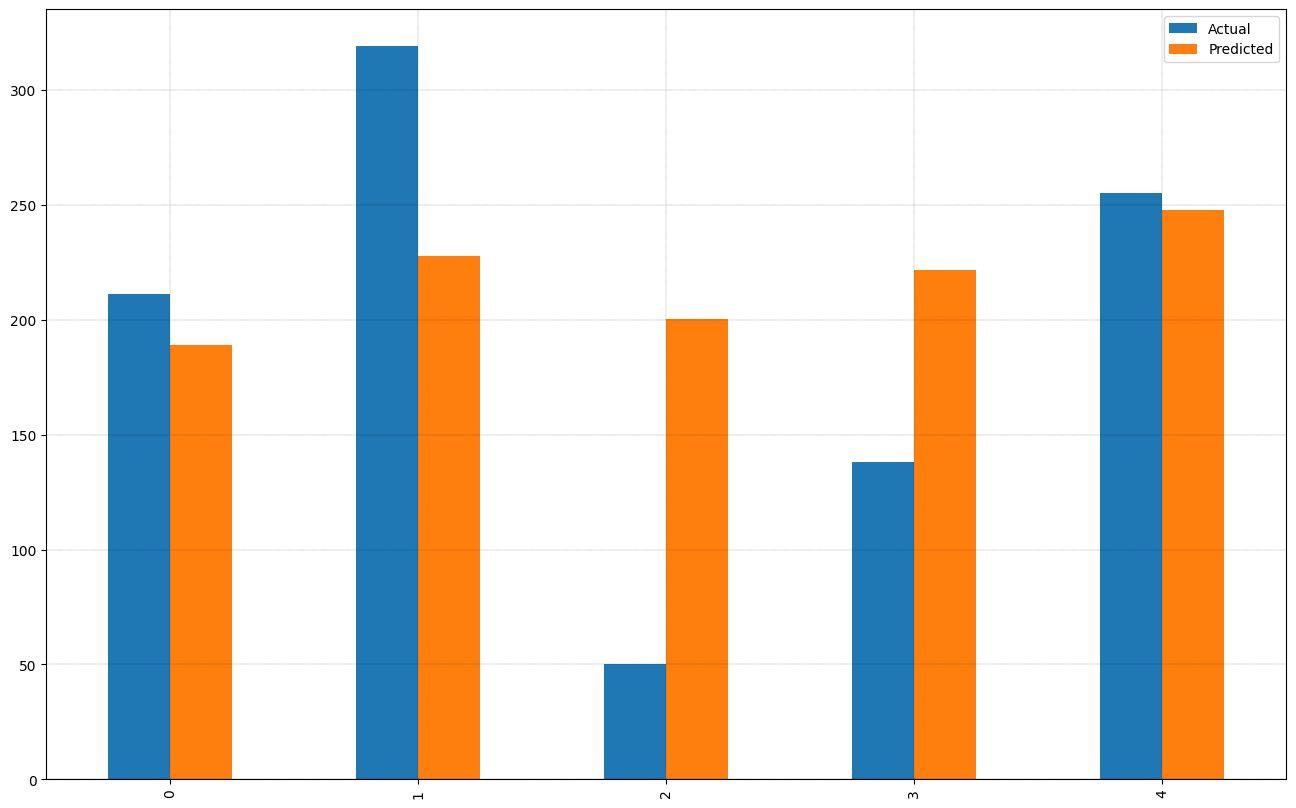

In [101]:
# Use this cell to visualize the comparison of those first 5 predictions, using a bar chart      /3 points op output
compare_df = pd.DataFrame({'Actual': y_LR_test.flatten(), 'Predicted': y_pred.flatten()})
compare25_df = compare_df.head(5)
compare25_df.plot(kind='bar', figsize=(16,10))
plt.grid(linestyle=':', linewidth='0.25', color='black')
plt.show()